In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
337,ham,Just sleeping..and surfing,NaN,NaN,NaN
1083,ham,Wat makes some people dearer is not just de ha...,NaN,NaN,NaN
3813,ham,Can. Dunno wat to get 4 her...,NaN,NaN,NaN
1594,ham,Never blame a day in ur life. Good days give u...,NaN,NaN,NaN
3742,ham,"Nah, Wednesday. When should I bring the mini c...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder=LabelEncoder()

In [10]:
print(df.columns)


Index(['Target', 'Text'], dtype='object')


In [11]:
df['Target']=encoder.fit_transform(df['Target'])

In [12]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

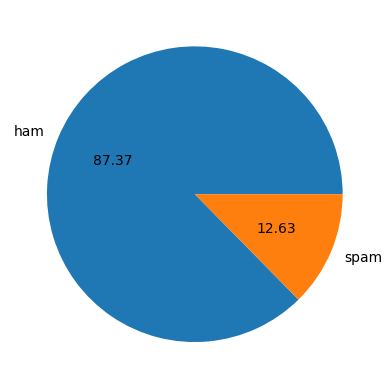

In [18]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
df['num_characters']=df["Text"].apply(len)

In [22]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

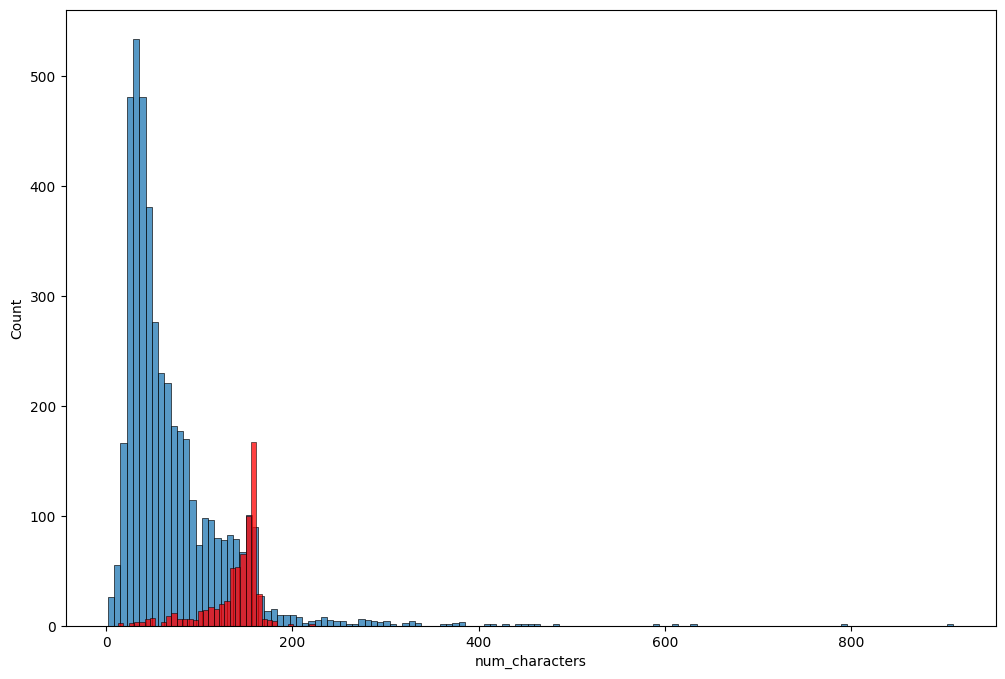

In [30]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')


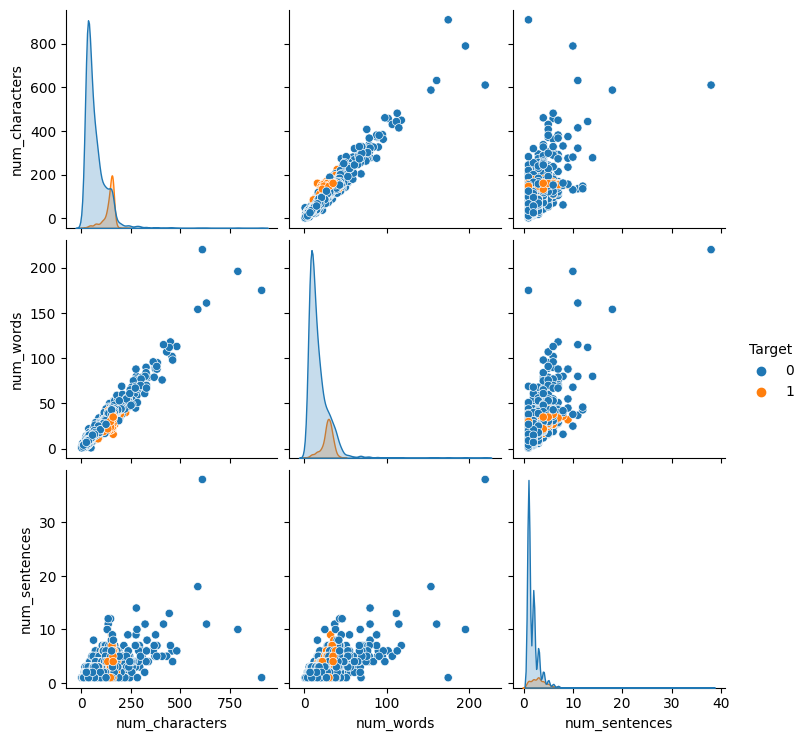

In [31]:
sns.pairplot(df, hue='Target')

<ipython-input-32-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

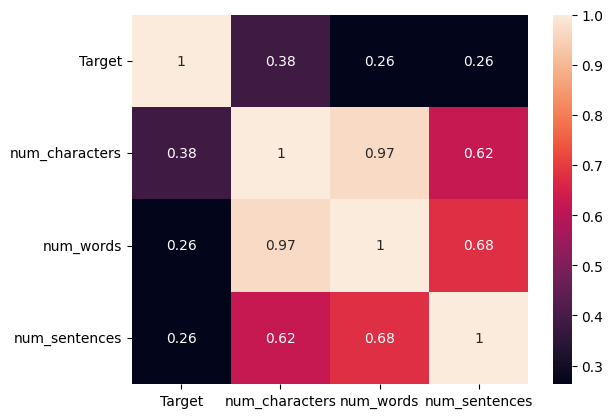

In [32]:
sns.heatmap(df.corr(), annot=True)

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [36]:
def transform_text(text):
  #To transform the text into lower characters
  text=text.lower()
  #To seperates the words in a given text
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  #we clone the text cuz if we append without cloning the text so the y.clear function will clear the text too
  text=y[:]
  y.clear()
 #to remove stop words and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()
  #to converts words into their root form eg: danacing to dance
  for i in text:
    y.append(ps.stem(i))

  #to make it a string we use " ".join()
  return" ".join(y)

In [37]:
df['transformed_text']=df['Text'].apply(transform_text)

In [38]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
#to check what are the important words
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [40]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

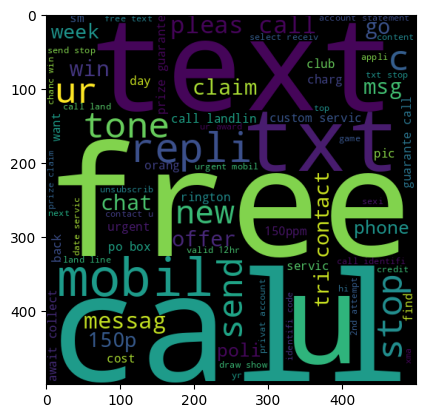

In [41]:
plt.imshow(spam_wc)

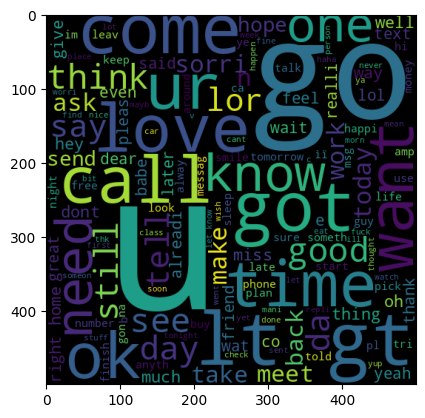

In [42]:
spam_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

In [43]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [52]:
#to check the most common 30 occuring words in spam
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [53]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [54]:
#to check the most common 30 occuring words in spam
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [55]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer(max_features=3000)

In [80]:
X=tf.fit_transform(df['transformed_text']).toarray()

In [81]:
X.shape

(5169, 3000)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

In [85]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print('accuracy', accuracy_score(y_test,y_pred))
print('precision', precision_score(y_test,y_pred))
print('confusion', confusion_matrix(y_test,y_pred))


accuracy 0.9709864603481625
precision 1.0
confusion [[896   0]
 [ 30 108]]


In [86]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
